# "Make Your Pandas Code Lightning Fast"

This notebook is a further exploration of Rob Mulla's excellent video on the topic of "Make Your Pandas Code Lightning Fast":

In [1]:
from IPython.display import YouTubeVideo

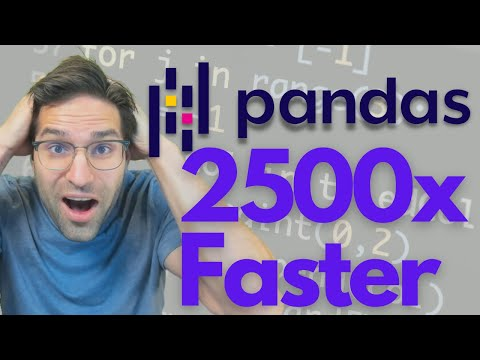

In [2]:
YouTubeVideo("SAFmrTnEHLg")

You should watch it to get an understanding of some of the issues working with Pandas, and writing code that runs fast.

But, there are other things not considered in this video:

1. What do you do if you have a larger dataset? 
2. What happens if all of the data won't easily fit into memory?
3. What about the time that it takes to learn the intricacies of Pandas?

The intricacies of Pandas are numerous, and glossed over in the video. It assumes that you already are a Pandas Master. For example:

* Why use the comparisons `&` and `|` rather than `and` and `or`?
* What is `df.loc[]`?
* Where does `df.apply()` save the results?
* What does `axis=1` mean?

The point here is that when writing fast code in Pandas, that does not account for learning a language different from Python. Pandas has its own mini-language inside Python, and you must know it in order to get such speed results.

Or do you?

This notebook explores Kangas DataGrid that can optimize your code in different dimensions:

1. Allowing for much larger dataset, even ones that don't fit in memory
2. Ability to use native Python syntax for filtering and column definitions

## Setup

As per Rob's video, we import the necessary libraries, create a function to return a dataframe, and define a function to perform the logic.

In [1]:
import pandas as pd
import numpy as np
import kangas as kg

In [2]:
def get_data(size=10_000):
    df = pd.DataFrame()
    df["age"] = np.random.randint(0, 100, size)
    df["time_in_bed"] = np.random.randint(0, 9, size)
    df["pct_sleeping"] = np.random.rand(size)
    df["favorite_food"] = np.random.choice(["pizza", "taco", "ice-cream"], size)
    df["hate_food"] = np.random.choice(["broccoli", "candy corn", "eggs-cream"], size)
    return df

In [3]:
df = get_data()
df

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,35,3,0.381887,pizza,broccoli
1,99,0,0.494654,pizza,eggs-cream
2,95,8,0.072905,taco,eggs-cream
3,43,8,0.844564,ice-cream,candy corn
4,82,1,0.949399,taco,eggs-cream
...,...,...,...,...,...
9995,63,0,0.306863,taco,broccoli
9996,18,4,0.536086,ice-cream,candy corn
9997,1,4,0.073297,ice-cream,candy corn
9998,74,8,0.270847,taco,broccoli


In [6]:
def reward_calc(row):
    if row["age"] >= 90:
        return row["favorite_food"]
    elif row["time_in_bed"] and row["pct_sleeping"] > 0.5:
        return row["favorite_food"]
    else:
        return row["hate_food"]

Below, we replicate Rob's three levels.

## Level 1 - Loop

In [7]:
%%timeit
for index, row in df.iterrows():
    df.loc[index, "reward"] = reward_calc(row)

2.19 s ± 52.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Level 2 - Apply

In [8]:
%%timeit
df.apply(reward_calc, axis=1)

333 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Level 3 - Vectorized

In [9]:
%%timeit
df["reward"] = df["hate_food"]
df.loc[((df["pct_sleeping"] > 0.5) & 
        (df["time_in_bed"] > 5)) | 
       (df["age"] >= 90), "reward"] = df["favorite_food"]

1.92 ms ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Summary

We get roughly the same results as Rob:

Level | Time
------|------
1     | 2190 ms
2     |  332 ms
3     |    2 ms

But let's consider the two orthogonal dimensions:

1. Allowing for much larger dataset, even ones that don't fit in memory
2. Ability to use native Python syntax for filtering and column definitions

## Level X - Kangas DataGrid

First, we turn a dataframe into a Kangas DataGrid:

In [4]:
dg = kg.read_dataframe(get_data())
dg.save("reward-with-food.datagrid")

Reading DataFrame...


10000it [00:00, 13163.24it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 7139.99it/s]


Saving data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 40894.15it/s]


Saving datagrid to 'reward-with-food.datagrid'...
Extending data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13780.90it/s]


Computing statistics...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 85.66it/s]


In [5]:
dg

<th colspan='1' >          row-id </th> <th colspan='1' >             age </th> <th colspan='1' >     time_in_bed </th> <th colspan='1' >    pct_sleeping </th> <th colspan='1' >   favorite_food </th> <th colspan='1' >       hate_food </th> <tr>
<td colspan='1' >               1 </td> <td colspan='1' >              65 </td> <td colspan='1' >               1 </td> <td colspan='1' > 0.4853938252643 </td> <td colspan='1' >            taco </td> <td colspan='1' >      candy corn </td> <tr>
<td colspan='1' >               2 </td> <td colspan='1' >              35 </td> <td colspan='1' >               7 </td> <td colspan='1' > 0.3293934440972 </td> <td colspan='1' >            taco </td> <td colspan='1' >      eggs-cream </td> <tr>
<td colspan='1' >               3 </td> <td colspan='1' >              12 </td> <td colspan='1' >               4 </td> <td colspan='1' > 0.3017003841999 </td> <td colspan='1' >           pizza </td> <td colspan='1' >        broccoli </td> <tr>
<td colspan='1' >               4 </td> <td colspan='1' >              69 </td> <td colspan='1' >               8 </td> <td colspan='1' > 0.2833961166289 </td> <td colspan='1' >            taco </td> <td colspan='1' >      candy corn </td> <tr>
<td colspan='1' >               5 </td> <td colspan='1' >              67 </td> <td colspan='1' >               5 </td> <td colspan='1' > 0.6364484465859 </td> <td colspan='1' >       ice-cream </td> <td colspan='1' >      eggs-cream </td> <tr>
...
<td colspan='1' >            9996 </td> <td colspan='1' >              36 </td> <td colspan='1' >               2 </td> <td colspan='1' > 0.0501103146779 </td> <td colspan='1' >       ice-cream </td> <td colspan='1' >      eggs-cream </td> <tr>
<td colspan='1' >            9997 </td> <td colspan='1' >              61 </td> <td colspan='1' >               5 </td> <td colspan='1' > 0.9691283345037 </td> <td colspan='1' >            taco </td> <td colspan='1' >        broccoli </td> <tr>
<td colspan='1' >            9998 </td> <td colspan='1' >              13 </td> <td colspan='1' >               2 </td> <td colspan='1' > 0.2126443522212 </td> <td colspan='1' >           pizza </td> <td colspan='1' >      eggs-cream </td> <tr>
<td colspan='1' >            9999 </td> <td colspan='1' >              68 </td> <td colspan='1' >               7 </td> <td colspan='1' > 0.8395738699121 </td> <td colspan='1' >            taco </td> <td colspan='1' >      eggs-cream </td> <tr>
<td colspan='1' >           10000 </td> <td colspan='1' >              75 </td> <td colspan='1' >               4 </td> <td colspan='1' > 0.2888404974283 </td> <td colspan='1' >           pizza </td> <td colspan='1' >        broccoli </td> <tr>
<tr>
<td colspan='6' style="text-align: left;"> [10000 rows x 5 columns] </td> <tr>

*  Use DataGrid.show() to start user interface

The DataGrid looks very similar to a DataFrame. However, you can also:

```python
dg.show()
```

to see a UI in the notebook to perform operations without code:

![Image of Kangas DataGrid UI](https://github.com/caleb-kaiser/kangas_examples/raw/master/Oct-25-2022%2016-43-56.gif)

If you were to try to write out the logic of the reward function in Python, one might write:

```python
{"favorite_food"} if (({"time_in_bed"} > 5 and {"pct_sleeping"} > 0.5) or ({"age"} >= 90)) else {"hate_food"}'
```

Here, we are using the special syntax `{"column name"}` to represent a column in the datagrid.

We can use that directly to create a new dataframe using Python syntax:

In [12]:
%%timeit
results = dg.select_dataframe(
    computed_columns={
        "reward": '{"favorite_food"} if (({"time_in_bed"} > 5 and {"pct_sleeping"} > 0.5) or ({"age"} >= 90)) else {"hate_food"}'
     }
)

110 ms ± 392 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


On my computer, that took about 110 ms. Not quite Level 3, but better than Level 2. But this is doing a lot:

1. creates a "computer column"
2. selects all of the data from the datagrid
3. converts the data into a dataframe

But there's more to be gained! You can use this part of the expression as a filter in the UI and see the paged results almost instantly:

```python
({"time_in_bed"} > 5 and {"pct_sleeping"} > 0.5) or ({"age"} >= 90)
```

Give it a try:

In [8]:
dg.show('(({"time_in_bed"} > 5 and {"pct_sleeping"} > 0.5) or ({"age"} >= 90))')

Once you have a DataGrid, there is much more one can do, without knowing any Pandas magic. For example, try "Group by" on "favorite_food" or "hate_food". If this were real data, you might find some hidden connections. Which is what many of are trying to do when working with Pandas.

We're big fans of Pandas. But remember: there are more **dimensions than just the time the code takes to run** when working on a problem.

Thanks! You can find out more about Kangas DataGrid here:

https://github.com/comet-ml/kangas